In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Logistic():

    def __init__(self):
        self.weights = None
        self.losses = []

    def logistic(self, z):
        return 1 / (1 + np.exp(-z))

    def get_data(self):
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
        self.dataset = pd.read_csv(url, names=names)
        self.classes = ['setosa', 'versicolor', 'virginica']
        
        # One hot encode categorial outputs
        self.dataset = pd.get_dummies(self.dataset)
        
        self.df_y = self.dataset.drop(names[:4], axis = 1)
        self.df_x = self.dataset[names[:4]]
        
        # Add bias
        self.df_x.insert(loc = 0, column = 'bias', value = 1)
        
        self.m_rows = self.df_x.shape[0]
        self.n_cols = self.df_x.shape[1]
    
    def get_arrays(self):
        # Make y array n x 1 for matrix operations
        self.y = np.array(self.df_y)
        self.x = np.array(self.df_x)

    def fit_SGD(self, batch_size, iterations, alpha):
        
        self.weights = np.zeros((self.n_cols, 3))
        self.losses = []
        
        for i in range(iterations):
            
            x_sample, y_sample = self.get_sample(batch_size)
            loss = self.calc_loss(x_sample, y_sample)
            self.losses.append(loss)
            
            grad = self.calc_gradient(x_sample, y_sample)
            self.weights -= alpha * grad
        
    def fit_BGD(self, iterations, alpha):
        
        self.fit_SGD(self.m_rows, iterations, alpha)
    
    def get_sample(self, size):
        sample_ids = np.random.choice(self.m_rows, size = size, replace = False)
        return self.x[sample_ids], self.y[sample_ids]
    
    def calc_gradient(self, x_sample, y_sample):
        return np.matmul(x_sample.T, self.predict(x_sample) - y_sample)
    
    def calc_loss(self, x_sample, y_sample):
        rows = x_sample.shape[0]
        h = self.predict(x_sample)
        return -(1/rows)*np.sum((y_sample * np.log(h) + (1 - y_sample) * np.log(1 - h)), axis = 0)

    def predict(self, inputs):
        return self.logistic(np.matmul(inputs, self.weights))

    def plot(self):
        plt.plot(range(len(self.losses)), self.losses)
        plt.legend(self.classes)
        plt.show()
        
    def reset(self):
        self.weights = np.zeros(self.n_cols, 3)
        self.losses = []

In [3]:
model = Logistic()
model.get_data()
model.get_arrays()

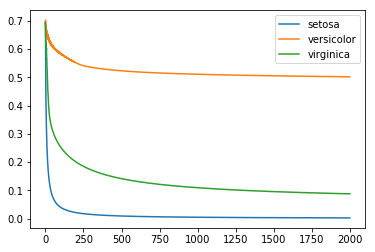

In [4]:
model.fit_BGD(2000, 0.001)
model.plot()

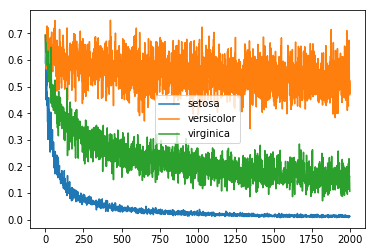

In [5]:
model.fit_SGD(30, 2000, 0.001)
model.plot()

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
predicted = np.argmax(model.predict(model.x), axis = 1)
true = np.argmax(model.y, axis = 1)

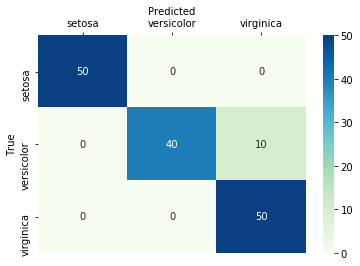

In [8]:
# Let's plot a confusion matrix for fun.

ax = sns.heatmap(pd.DataFrame(confusion_matrix(true, predicted), model.classes, model.classes),
                 annot = True,
                 cmap = 'GnBu',
                 fmt = 'd')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()